<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">In His name</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> A simple perceptone Classifier </div></center></h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> Amir mahmood mousavi 3971242026 </div></center>

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from collections import Counter

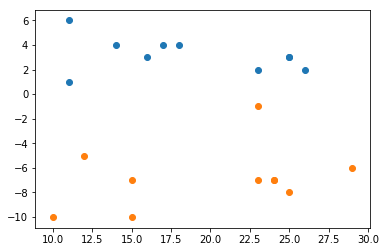

In [2]:
const=10
x=[random.randrange(10, 30) for _ in range(const)]
y=[random.randrange(-0,10)for _ in range(const)]
x1=[random.randrange(10, 30) for _ in range(const)]
y1=[random.randrange(-10, 0) for _ in range(const)]
ylabel=[0 for _ in range(const)]
xlabel=[1 for _ in range(const)]
bias=[1 for _ in range(const)]
plt.scatter(x,y)
plt.scatter(x1,y1)

In [72]:
class1=np.array([bias,x,y]).T
class2=np.array([bias,x1,y1]).T
class1

array([[ 1, 24,  7],
       [ 1, 16,  3],
       [ 1, 17,  0],
       [ 1, 19,  8],
       [ 1, 13,  5],
       [ 1, 24,  5],
       [ 1, 20,  4],
       [ 1, 13,  4],
       [ 1, 18,  1],
       [ 1, 10,  0]])

In [73]:
arr=np.concatenate((class1, class2), axis=0)
label=np.concatenate((xlabel, ylabel), axis=0)
len(arr)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
x=arr
# data_dictionary= dict(((arr[i][0],arr[i][1]),arr[i][2]) for i in range(0, len(arr)))

In [75]:
alpha = 0.2
epochs = 100

w0 = np.random.randn()
w1 = np.random.randn()
w2 = np.random.randn()

print("Initial weights : ")
print("w0 = ", w0, "w1 = ", w1, "w2 = ", w2)


Initial weights : 
w0 =  -0.6084696727805601 w1 =  1.796993738833317 w2 =  0.03566974305108739


In [3]:

train_data_temp = [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
train_data = np.asarray(train_data_temp)


op_f = [1, 1, 1, 0]  # NAND
#op_f = [0, 1, 1, 0]  # xor

op = np.asarray(op_f)

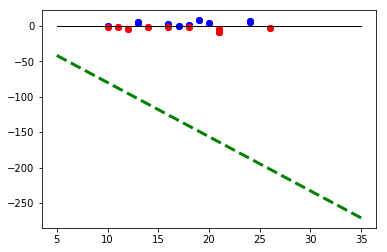

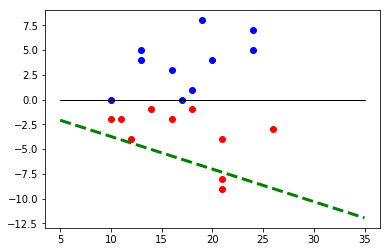

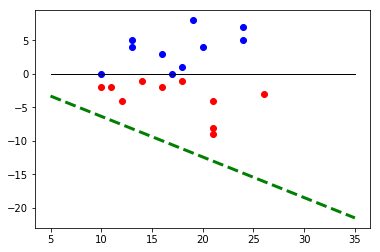

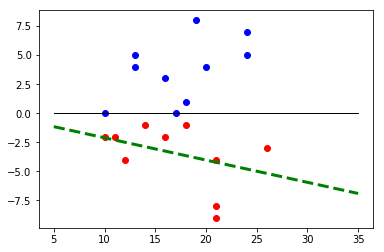

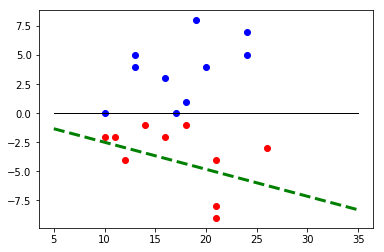

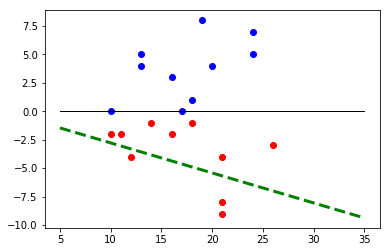

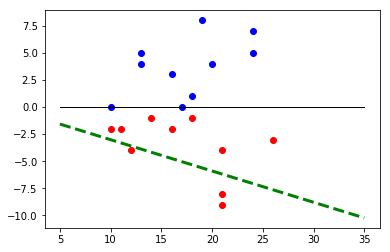

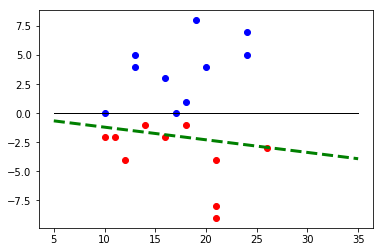

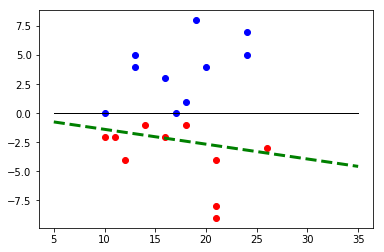

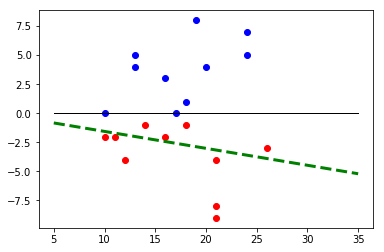

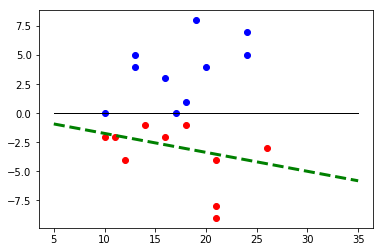

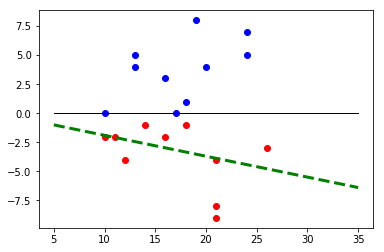

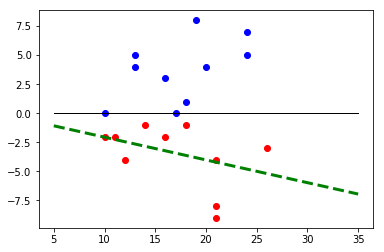

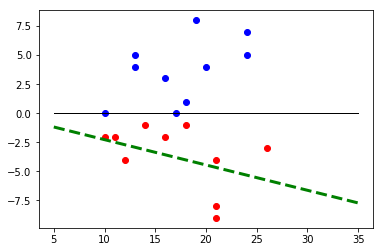

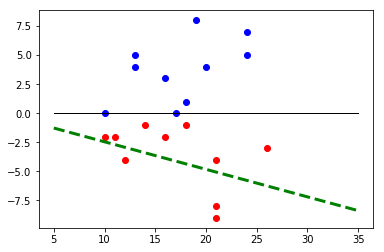

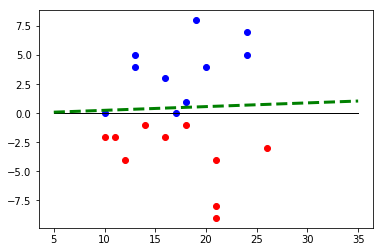

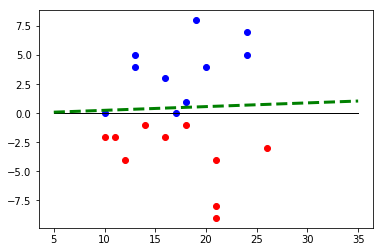

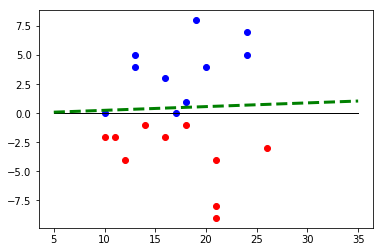

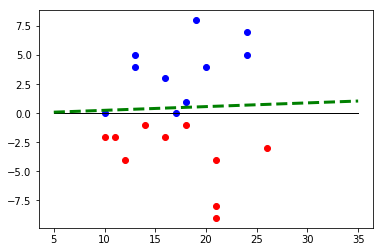

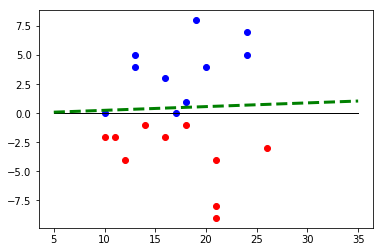

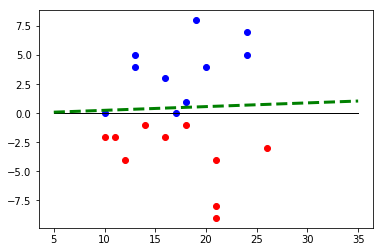

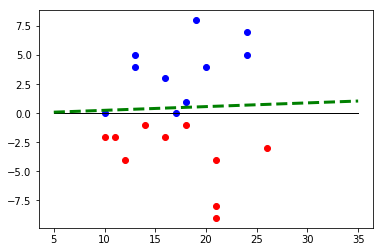

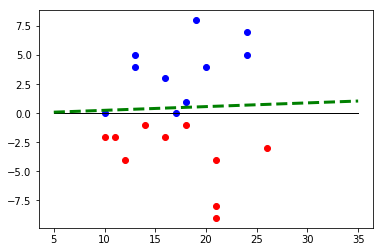

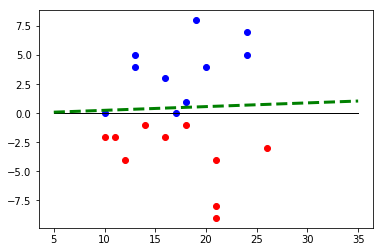

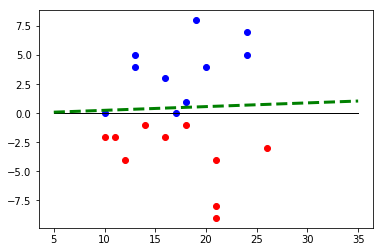

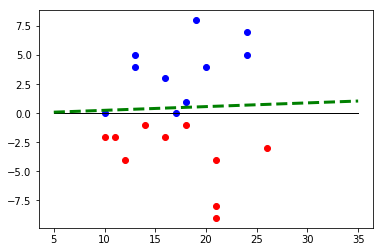

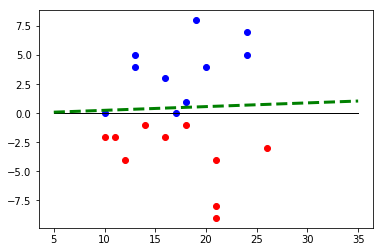

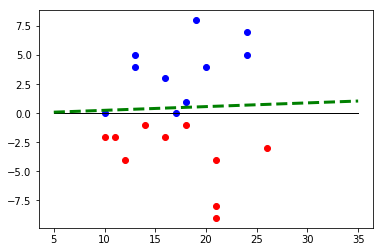

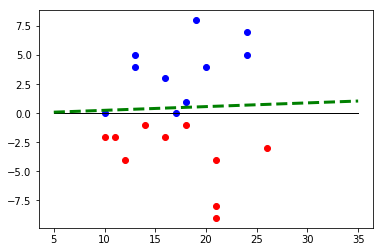

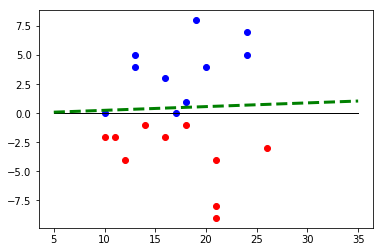

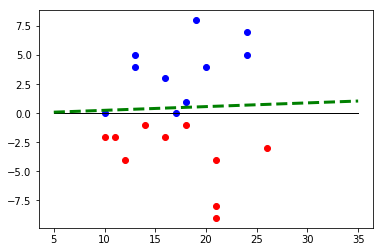

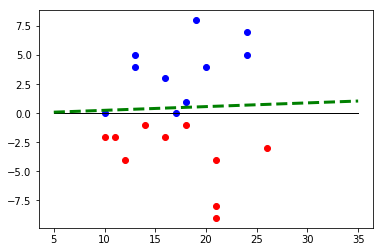

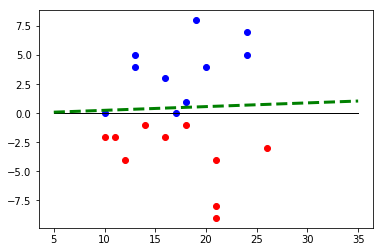

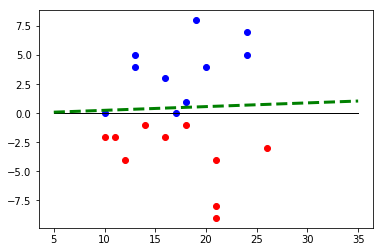

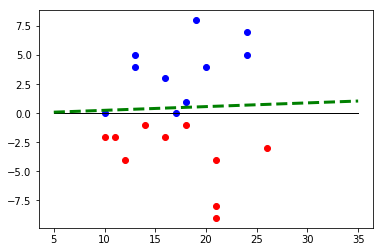

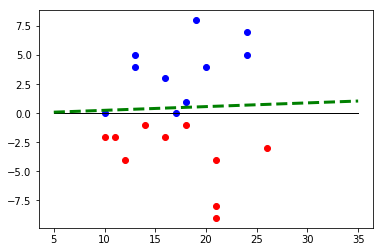

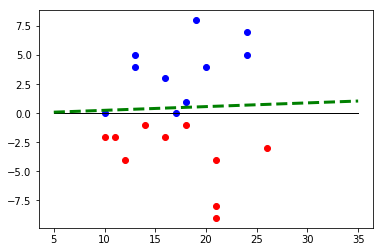

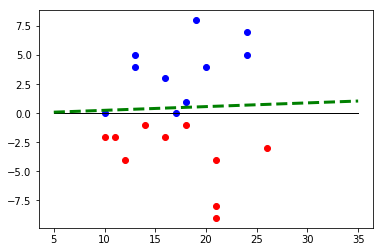

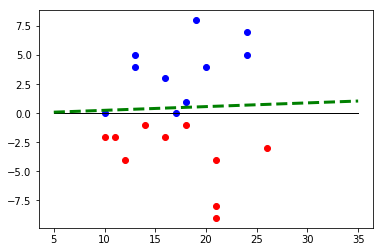

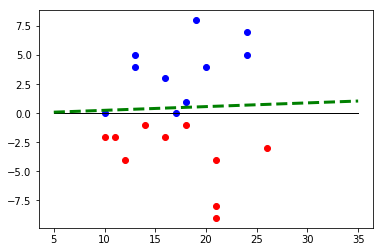

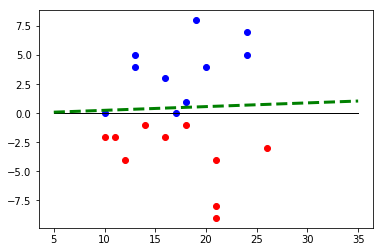

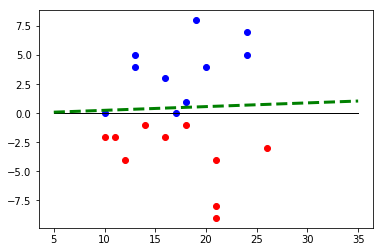

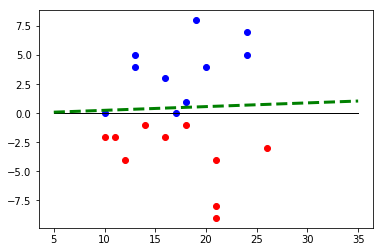

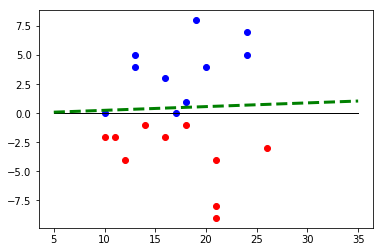

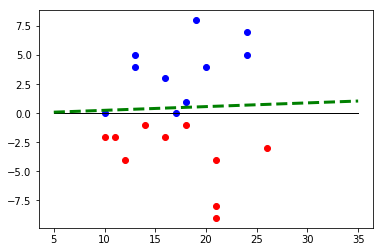

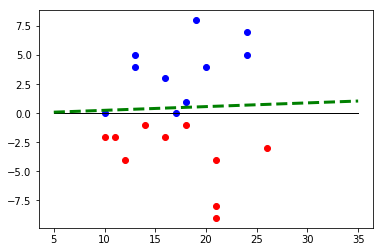

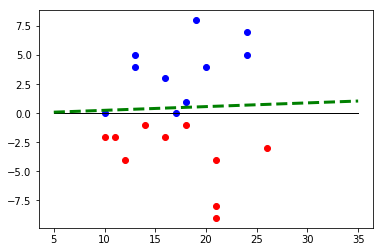

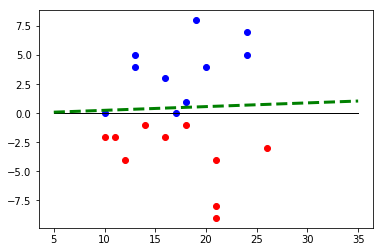

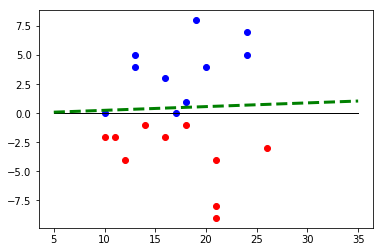

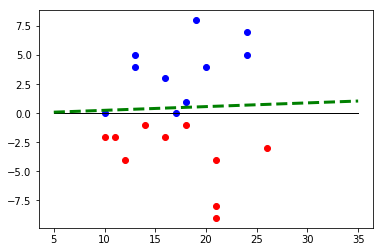

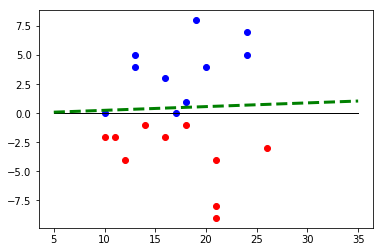

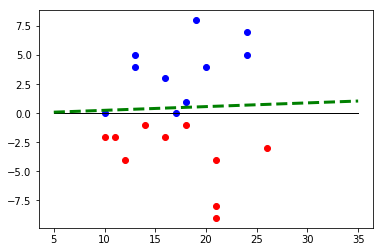

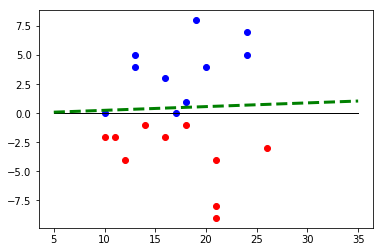

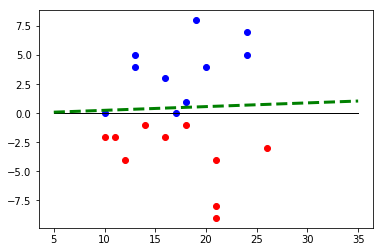

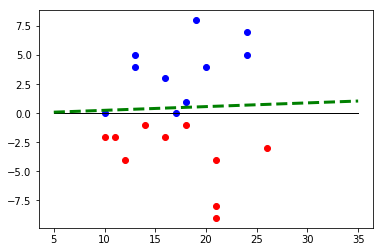

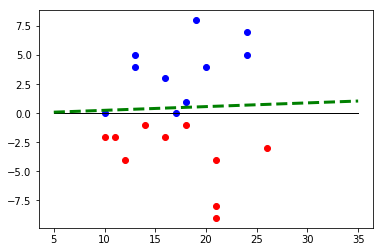

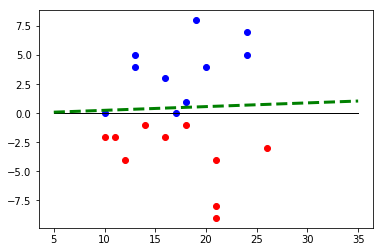

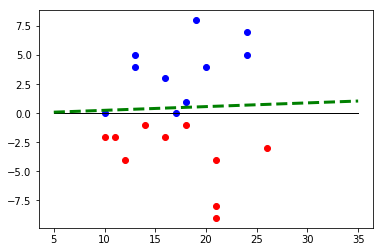

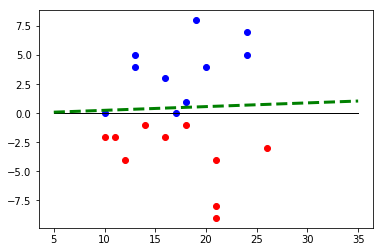

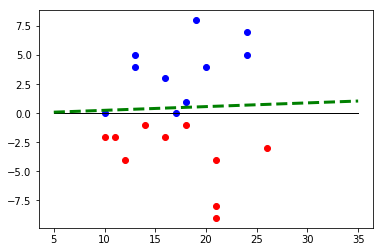

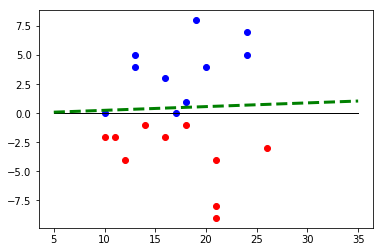

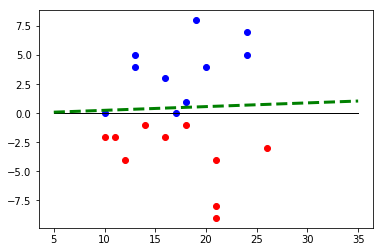

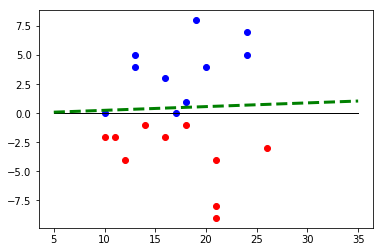

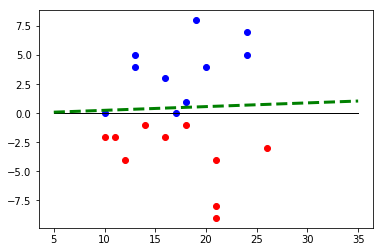

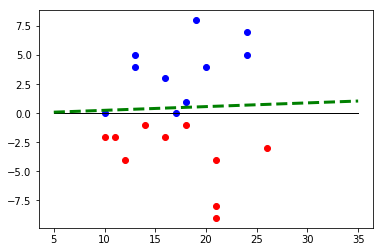

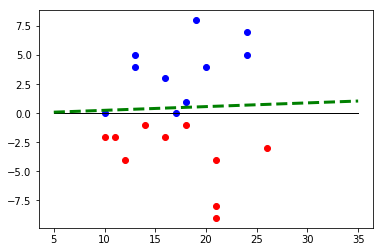

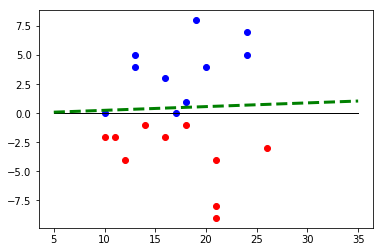

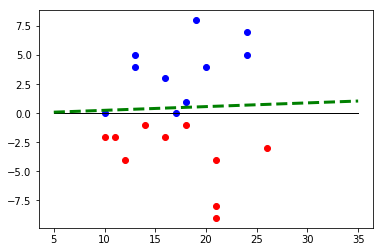

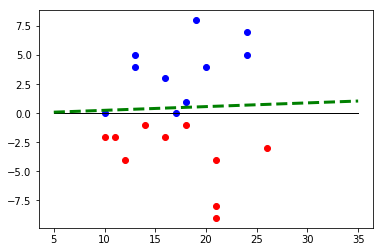

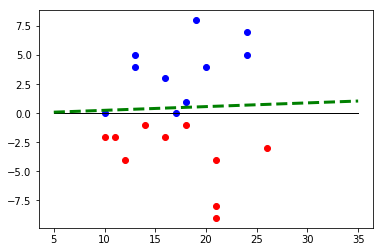

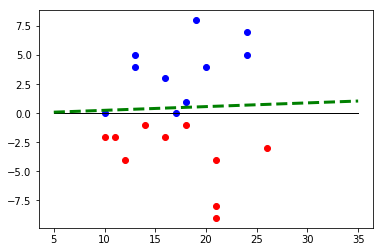

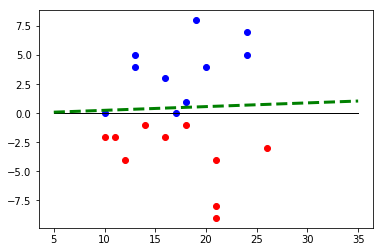

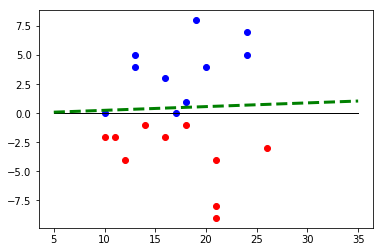

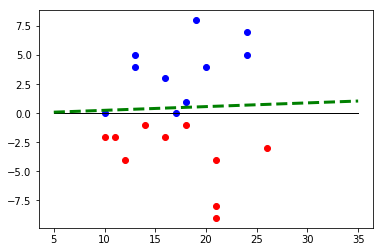

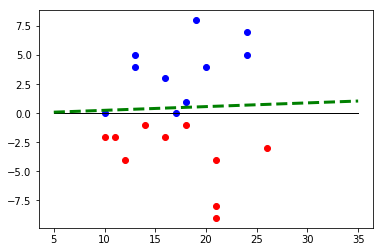

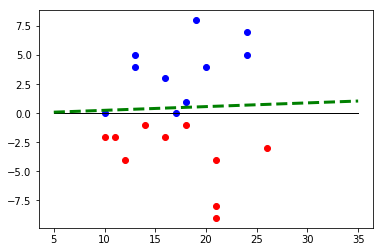

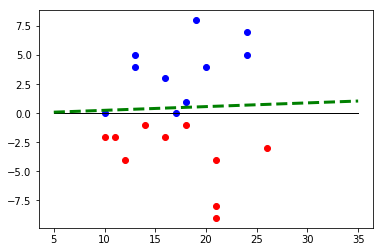

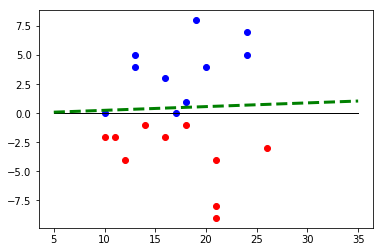

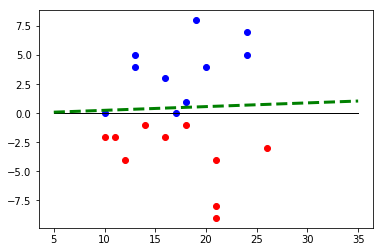

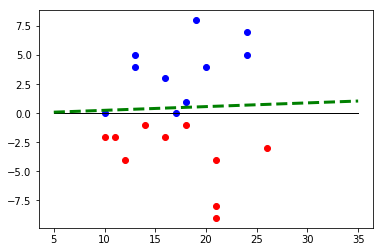

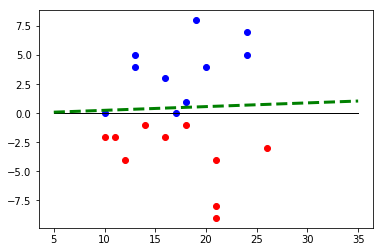

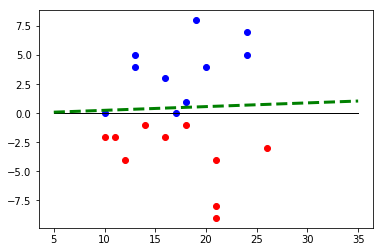

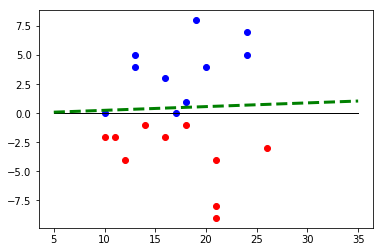

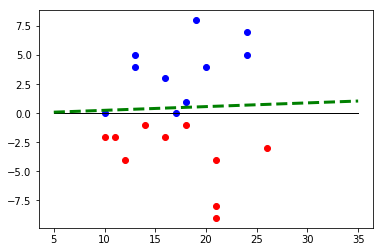

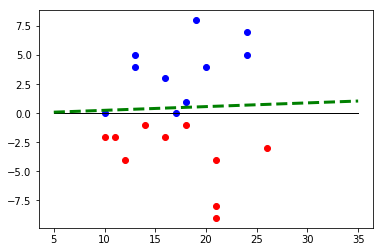

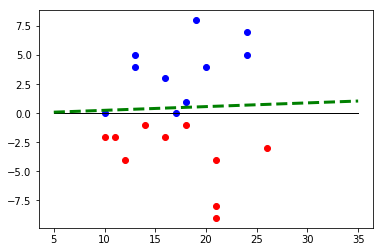

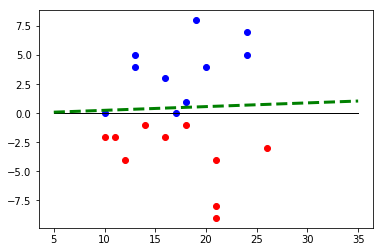

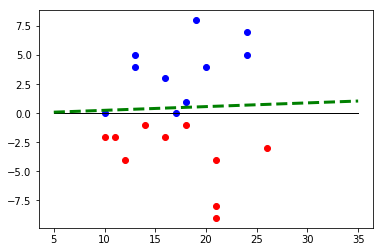

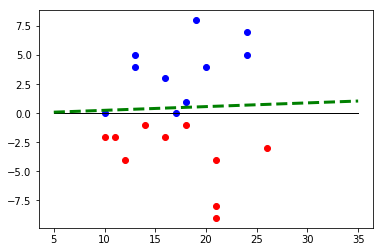

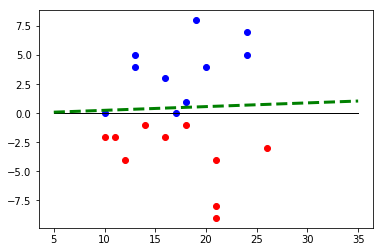

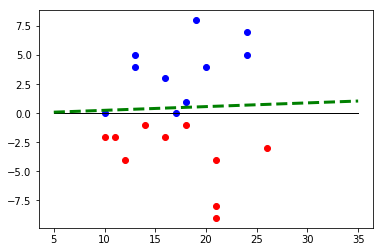

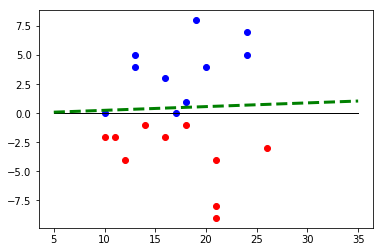

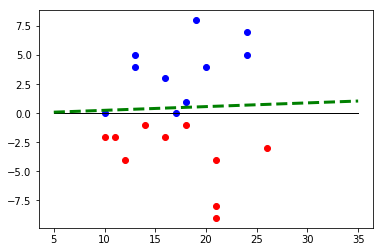

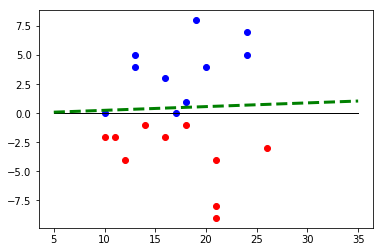

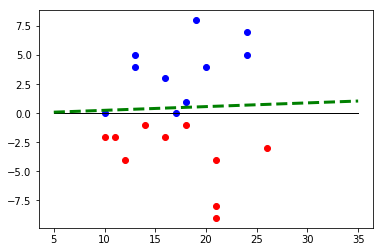

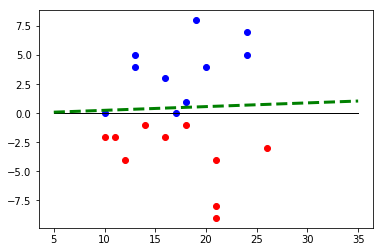

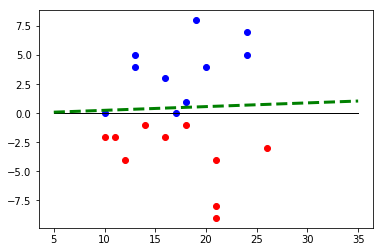

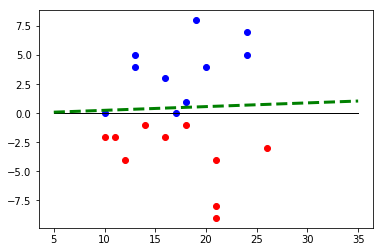

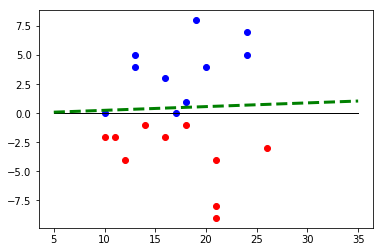

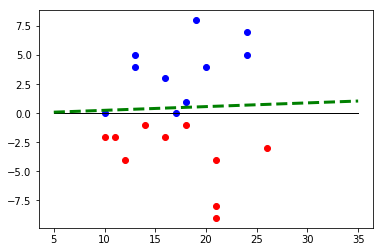

epoch : 100 
error =  0

Final weights : 
w0 =  -0.80846967278056 w1 =  0.3969937388333218 w2 =  12.435669743051083


In [77]:
''' TRAINING PROCESS '''
c=[]
n=[]
for j in range (0,len(class1)):
    n.append(class1[j][1])
m=[]
for j in range (0,len(class1)):
    m.append(class1[j][2])
    
n1=[]
for j in range (0,len(class2)):
    n1.append(class2[j][1])
m1=[]
for j in range (0,len(class2)):
    m1.append(class2[j][2])
    

plt.plot(n, m,'bo')  
plt.plot(n1, m1,'ro')


for i in range(epochs):
    j = 0
    for x in train_data:
        res = w0 * x[0] + w1 * x[1] + w2 * x[2]

        if (res >= 0):
            act = 1
        else:
            act = 0

        # act = 1/(1+math.exp(-x))

        err = op[j] - act
        

        w0 = w0 + (alpha * x[0] * err) # w=w0+(kessi*X*err)
        w1 = w1 + (alpha * x[1] * err)
        w2 = w2 + (alpha * x[2] * err)

        j = j + 1
        
    c.append(err)
    plt.plot(n, m,'bo')  
    plt.plot(n1, m1,'ro')

    plt.plot([5, 35], [0, 0], color='k', linestyle='-', linewidth=1)
    x = np.linspace(5,35,100)
    y = (w1*x+w0)/w2
    plt.plot(x, y, '--g', label='y=2x+1',linewidth=3)
# print(x)  
    plt.show()
   

print("epoch :", i + 1, "\nerror = ", err)


print("\nFinal weights : ")
print("w0 = ", w0, "w1 = ", w1, "w2 = ", w2)




Text(0.5, 0, 'epoches')

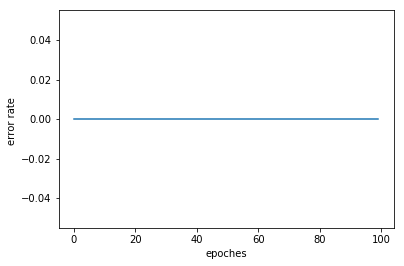

In [67]:

plt.plot(range(0,epochs), c)
# Labelling the x axis as the iterations axis.
plt.ylabel("error rate ")

# Labelling the y axis as the cost axis.
plt.xlabel("epoches")

In [10]:

test_data = [[ 16,  22],
       [ 20,  15],
       [ 15,  12],
       [ 24,  27],
       [ 21,  18],
       [ 11,  13],
       [ 21,  23],
       [ 28,  13],
       [ 29,  23],
       [ 28,  12],
       [ 14, -14],
       [ 13, -19],
       [ 20, -22],
       [ 23, -12],
       [ 10, -28],
       [ 15, -13],
       [ 24, -26],
       [ 21, -19],
       [ 23, -29],
       [ 19, -20]]

test_op = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # NAND

total = 20
correct = 0
error = 0
for i in range(len(test_data)):
    temp = w0 + w1 * test_data[i][0] + w2 * test_data[i][1] #sum of X*W
    ans = 1 / (1 + math.exp(-temp)) #activation function

    if (temp >= 0):
        ans = 1
    else:
        ans = 0

    print("\nx1 : ", test_data[i][0], ",x2 : ", test_data[i][1])
    print("Predicted : ", ans, ",Actual : ", test_op[i])

    if (ans == test_op[i]):
        correct = correct + 1
    else:
        error = error + 1

print("\nerrors  : ", error )
print("\nAccuracy : ", (correct / total)*100 , "%")


x1 :  16 ,x2 :  22
Predicted :  1 ,Actual :  1

x1 :  20 ,x2 :  15
Predicted :  1 ,Actual :  1

x1 :  15 ,x2 :  12
Predicted :  1 ,Actual :  1

x1 :  24 ,x2 :  27
Predicted :  1 ,Actual :  1

x1 :  21 ,x2 :  18
Predicted :  1 ,Actual :  1

x1 :  11 ,x2 :  13
Predicted :  1 ,Actual :  1

x1 :  21 ,x2 :  23
Predicted :  1 ,Actual :  1

x1 :  28 ,x2 :  13
Predicted :  1 ,Actual :  1

x1 :  29 ,x2 :  23
Predicted :  1 ,Actual :  1

x1 :  28 ,x2 :  12
Predicted :  1 ,Actual :  1

x1 :  14 ,x2 :  -14
Predicted :  0 ,Actual :  0

x1 :  13 ,x2 :  -19
Predicted :  0 ,Actual :  0

x1 :  20 ,x2 :  -22
Predicted :  0 ,Actual :  0

x1 :  23 ,x2 :  -12
Predicted :  0 ,Actual :  0

x1 :  10 ,x2 :  -28
Predicted :  0 ,Actual :  0

x1 :  15 ,x2 :  -13
Predicted :  0 ,Actual :  0

x1 :  24 ,x2 :  -26
Predicted :  0 ,Actual :  0

x1 :  21 ,x2 :  -19
Predicted :  0 ,Actual :  0

x1 :  23 ,x2 :  -29
Predicted :  0 ,Actual :  0

x1 :  19 ,x2 :  -20
Predicted :  0 ,Actual :  0

errors  :  0

Accuracy :  100

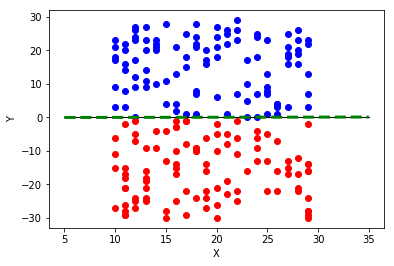

In [21]:
n=[]
for j in range (0,len(class1)):
    n.append(class1[j][1])
m=[]
for j in range (0,len(class1)):
    m.append(class1[j][2])
    
n1=[]
for j in range (0,len(class2)):
    n1.append(class2[j][1])
m1=[]
for j in range (0,len(class2)):
    m1.append(class2[j][2])
    

plt.plot(n, m,'bo')  
plt.plot(n1, m1,'ro')



# Labelling the x axis as the iterations axis.
plt.xlabel("X")

# Labelling the y axis as the cost axis.
plt.ylabel("Y")

plt.plot([5, 35], [0, 0], color='k', linestyle='-', linewidth=1)
x = np.linspace(5,35,100)
y = (w1*x+w0)/w2
plt.plot(x, y, '--g', label='y=2x+1',linewidth=3)
# print(x)  
plt.show()

# Showing the plot.


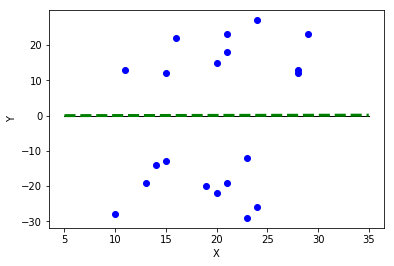

In [22]:
n=[]
for j in range (0,len(test_data)):
    n.append(test_data[j][0])
m=[]
for j in range (0,len(test_data)):
    m.append(test_data[j][1])
    


plt.plot(n, m,'bo')  




# Labelling the x axis as the iterations axis.
plt.xlabel("X")

# Labelling the y axis as the cost axis.
plt.ylabel("Y")

plt.plot([5, 35], [0, 0], color='k', linestyle='-', linewidth=1)
x = np.linspace(5,35,100)
y = (w1*x+w0)/w2
plt.plot(x, y, '--g', label='y=2x+1',linewidth=3)
# print(x)  
plt.show()

# Showing the plot.



<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> A simple perceptone Classifier (sklearn) </div></center></h1>

array([[ 29,  47],
       [ 90,  10],
       [ 38, 145],
       ...,
       [ 54, -28],
       [ 62, -35],
       [ 83, -75]])

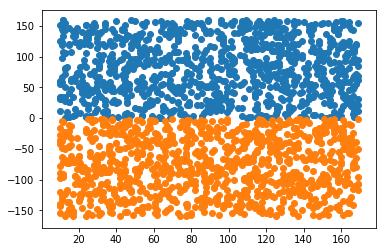

In [4]:
cns=1000
x=[random.randrange(10, 170) for _ in range(cns)]
y=[random.randrange(0, 160) for _ in range(cns)]
x1=[random.randrange(10, 170) for _ in range(cns)]
y1=[random.randrange(-160, 0) for _ in range(cns)]
ylabel=[0 for _ in range(cns)]
xlabel=[1 for _ in range(cns)]
bias=[1 for _ in range(cns)]
plt.scatter(x,y)
plt.scatter(x1,y1)

class1=np.array([x,y]).T
class2=np.array([x1,y1]).T
arr=np.concatenate((class1, class2), axis=0)
label=np.concatenate((xlabel, ylabel), axis=0)
len(arr)
arr

Text(0.5, 1.0, 'Perceptron')

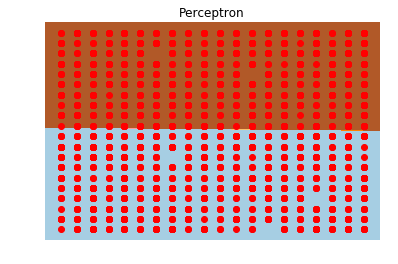

In [79]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

X = arr
Y = label
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

clf = Perceptron(tol=1e-3, random_state=0).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c='r', cmap=plt.cm.Paired)

ax.set_title('Perceptron')